In [1]:
import pandas as pd
import email
import matplotlib.pyplot as plt
import re
import numpy as np
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("./enron_emails.csv")
df

,filepath,email
0,arnold-j/notes_inbox/36.,Message-ID: <17334447.1075857585446.JavaMail.e...
1,arnold-j/notes_inbox/19.,Message-ID: <19171686.1075857585034.JavaMail.e...
2,arnold-j/notes_inbox/50.,Message-ID: <29887033.1075857630725.JavaMail.e...
3,arnold-j/notes_inbox/3.,Message-ID: <29084893.1075849630138.JavaMail.e...
4,arnold-j/notes_inbox/9.,Message-ID: <30248874.1075857584813.JavaMail.e...
...,...,...
517396,scholtes-d/stf/current_issues/12.,Message-ID: <18618854.1075840028791.JavaMail.e...
517397,scholtes-d/stf/current_issues/8.,Message-ID: <14350892.1075840028690.JavaMail.e...
517398,scholtes-d/stf/e_tag/3.,Message-ID: <21704474.1075840029683.JavaMail.e...
517399,scholtes-d/stf/e_tag/1.,Message-ID: <9367927.1075840029633.JavaMail.ev...


In [3]:
def filter_csv_by_file_path(df):

    # Define the strings to search for in the "file_path" column
    strings_to_search = ["/sent/", "/_sent_mail/", "/sent_items/"]

    # Filter rows where "file_path" contains any of the specified strings
    filtered_df = df[df['filepath'].str.contains('|'.join(strings_to_search))]

    return filtered_df

In [4]:
df = filter_csv_by_file_path(df)
df

,filepath,email
1417,arnold-j/sent_items/36.,Message-ID: <9123084.1075852711089.JavaMail.ev...
1418,arnold-j/sent_items/759.,Message-ID: <18868363.1075861674552.JavaMail.e...
1419,arnold-j/sent_items/313.,Message-ID: <12039709.1075852718837.JavaMail.e...
1420,arnold-j/sent_items/710.,Message-ID: <32383725.1075861672931.JavaMail.e...
1421,arnold-j/sent_items/264.,Message-ID: <24227153.1075852716775.JavaMail.e...
...,...,...
517239,scholtes-d/sent_items/18.,Message-ID: <20865574.1075840024696.JavaMail.e...
517240,scholtes-d/sent_items/12.,Message-ID: <9682082.1075840024546.JavaMail.ev...
517241,scholtes-d/sent_items/8.,Message-ID: <16491778.1075840024450.JavaMail.e...
517242,scholtes-d/sent_items/124.,Message-ID: <17311779.1075840027415.JavaMail.e...


In [5]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

In [6]:
df['body'] = body(df['email'])
df

C:\Users\dvroh\AppData\Local\Temp\ipykernel_28444\3696220984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body'] = body(df['email'])


,filepath,email,body
1417,arnold-j/sent_items/36.,Message-ID: <9123084.1075852711089.JavaMail.ev...,\n---------------------- Forwarded by John Arn...
1418,arnold-j/sent_items/759.,Message-ID: <18868363.1075861674552.JavaMail.e...,let's push until monday\n\n -----Original Mess...
1419,arnold-j/sent_items/313.,Message-ID: <12039709.1075852718837.JavaMail.e...,what's pdx?\n\n -----Original Message-----\nFr...
1420,arnold-j/sent_items/710.,Message-ID: <32383725.1075861672931.JavaMail.e...,"BMO wants to do this sleave trade. Duke, Dyne..."
1421,arnold-j/sent_items/264.,Message-ID: <24227153.1075852716775.JavaMail.e...,I'm big seller of interventions. they tend no...
...,...,...,...
517239,scholtes-d/sent_items/18.,Message-ID: <20865574.1075840024696.JavaMail.e...,Our Purchases:\n\n11/1\tTo PSE-EPMI MC - you h...
517240,scholtes-d/sent_items/12.,Message-ID: <9682082.1075840024546.JavaMail.ev...,\n\n-----Original Message-----\nFrom: sccobb@s...
517241,scholtes-d/sent_items/8.,Message-ID: <16491778.1075840024450.JavaMail.e...,1\n\n -----Original Message-----\nFrom: \tDiam...
517242,scholtes-d/sent_items/124.,Message-ID: <17311779.1075840027415.JavaMail.e...,"Stewart, \n \nI left you an envelope with info..."


In [7]:
# this function receives raw text and removes the following items - Filename and Forwarded By data

def raw_text_processing(TextRaw):
    
    if re.search(r"X-FileName:.+\n+((.+\n\n?)+)", TextRaw):
        text = re.search(r"X-FileName:.+\n+((?:.+\n\n?)+)", TextRaw).group(1)
        
        if re.match(r"-{3,} Forwarded by.+\d+\/\d+\/\d+", text):
            return np.NaN
        
        if re.search(r"-{3,} Forwarded by.+\d+\/\d+\/\d+[\w\W]+", text):
            text = re.sub(r"-{3,} Forwarded by.+\d+\/\d+\/\d+[\w\W]+", "", text)
        
        if re.search(r"-{5,}Original Message-{5,}[\w\W].*", text):
            text = re.sub(r"-{5,}Original Message-{5,}[\w\W]*[\n]*.*", "", text)
            
        if text:
            return text
        else:
            return np.NaN
        
    elif re.search(r"X-FileName:.+\n+(.+)", TextRaw):
        text = re.search(r"X-FileName:.+\n+(.+)", TextRaw).group(1)
        
        if re.match(r"-{3,} Forwarded by.+\d+\/\d+\/\d+", text):
            return np.NaN
    
        if re.search(r"-{3,} Forwarded by.+\d+\/\d+\/\d+[\w\W]+", text):
            text = re.sub(r"-{3,} Forwarded by.+\d+\/\d+\/\d+[\w\W]+", "", text)
        
        if re.search(r"-{5,}Original Message-{5,}[\w\W].*", text):
            text = re.sub(r"-{5,}Original Message-{5,}[\w\W]*[\n]*.*", "", text)
            
        if text:
            return text
        else:
            return np.NaN
    
    else:
        return np.NaN

In [8]:
df['processedBody'] = df['email'].apply(raw_text_processing)
df[['body','processedBody']].head(50)

C:\Users\dvroh\AppData\Local\Temp\ipykernel_28444\4277259783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processedBody'] = df['email'].apply(raw_text_processing)


,body,processedBody
1417,\n---------------------- Forwarded by John Arn...,NaN
1418,let's push until monday\n\n -----Original Mess...,let's push until monday\n\n
1419,what's pdx?\n\n -----Original Message-----\nFr...,what's pdx?\n\n
1420,"BMO wants to do this sleave trade. Duke, Dyne...","BMO wants to do this sleave trade. Duke, Dyne..."
1421,I'm big seller of interventions. they tend no...,I'm big seller of interventions. they tend no...
1422,Darren:\nI think Dutch Quigley spoke to you ab...,Darren:\nI think Dutch Quigley spoke to you ab...
1423,Hey babe:\nAny chance there are copies of the ...,Hey babe:\n
1424,cold 11-15. oct expires tomorrow.\n\n -----Or...,cold 11-15. oct expires tomorrow.\n\n
1425,you think i'm going to put this in ellectronic...,you think i'm going to put this in ellectronic...
1426,yes. i'm leaving at 1:00 today/\n\n -----Orig...,yes. i'm leaving at 1:00 today/\n\n


In [110]:
# def clean_column(data):
#     if data is not None:
#         stopwords_list = stopwords.words('english')
#         #exclusions = ['RE:', 'Re:', 're:']
#         #exclusions = '|'.join(exclusions)
#         data =  data.lower()
#         data = re.sub('re:', '', data)
#         data = re.sub('-', '', data)
#         data = re.sub('_', '', data)
#         # Remove data between square brackets
#         data =re.sub('\[[^]]*\]', '', data)
#         # removes punctuation
#         data = re.sub(r'[^\w\s]','',data)
#         data = re.sub(r'\n',' ',data)
#         data = re.sub(r'[0-9]+','',data)
#         # strip html 
#         p = re.compile(r'<.*?>')
#         data = re.sub(r"\'ve", " have ", data)
#         data = re.sub(r"can't", "cannot ", data)
#         data = re.sub(r"n't", " not ", data)
#         data = re.sub(r"I'm", "I am", data)
#         data = re.sub(r" m ", " am ", data)
#         data = re.sub(r"\'re", " are ", data)
#         data = re.sub(r"\'d", " would ", data)
#         data = re.sub(r"\'ll", " will ", data)
#         data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
#         data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)
        
#         data = p.sub('', data)
#         if 'forwarded by:' in data:
#             data = data.split('subject')[1]
#         data = data.strip()
#         return data
#     return 'No Subject'

In [111]:
# df['processedBody'] = df['processedbody'].apply(clean_column)
# df

In [112]:
df.iloc[0]['processedBody']

nan

In [9]:
df['sender'] = df['filepath'].str.split('/').str[0]
df

C:\Users\dvroh\AppData\Local\Temp\ipykernel_28444\488912531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sender'] = df['filepath'].str.split('/').str[0]


,filepath,email,body,processedBody,sender
1417,arnold-j/sent_items/36.,Message-ID: <9123084.1075852711089.JavaMail.ev...,\n---------------------- Forwarded by John Arn...,NaN,arnold-j
1418,arnold-j/sent_items/759.,Message-ID: <18868363.1075861674552.JavaMail.e...,let's push until monday\n\n -----Original Mess...,let's push until monday\n\n,arnold-j
1419,arnold-j/sent_items/313.,Message-ID: <12039709.1075852718837.JavaMail.e...,what's pdx?\n\n -----Original Message-----\nFr...,what's pdx?\n\n,arnold-j
1420,arnold-j/sent_items/710.,Message-ID: <32383725.1075861672931.JavaMail.e...,"BMO wants to do this sleave trade. Duke, Dyne...","BMO wants to do this sleave trade. Duke, Dyne...",arnold-j
1421,arnold-j/sent_items/264.,Message-ID: <24227153.1075852716775.JavaMail.e...,I'm big seller of interventions. they tend no...,I'm big seller of interventions. they tend no...,arnold-j
...,...,...,...,...,...
517239,scholtes-d/sent_items/18.,Message-ID: <20865574.1075840024696.JavaMail.e...,Our Purchases:\n\n11/1\tTo PSE-EPMI MC - you h...,Our Purchases:\n\n11/1\tTo PSE-EPMI MC - you h...,scholtes-d
517240,scholtes-d/sent_items/12.,Message-ID: <9682082.1075840024546.JavaMail.ev...,\n\n-----Original Message-----\nFrom: sccobb@s...,NaN,scholtes-d
517241,scholtes-d/sent_items/8.,Message-ID: <16491778.1075840024450.JavaMail.e...,1\n\n -----Original Message-----\nFrom: \tDiam...,1\n\n,scholtes-d
517242,scholtes-d/sent_items/124.,Message-ID: <17311779.1075840027415.JavaMail.e...,"Stewart, \n \nI left you an envelope with info...","Stewart, \n \nI left you an envelope with info...",scholtes-d


In [10]:
# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [11]:
df['subject'] = get_field("Subject", df['email'])
df['date'] = get_field("Date", df['email'])
df['folder'] = get_field("X-Folder", df['email'])
df

C:\Users\dvroh\AppData\Local\Temp\ipykernel_28444\148086024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subject'] = get_field("Subject", df['email'])
C:\Users\dvroh\AppData\Local\Temp\ipykernel_28444\148086024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = get_field("Date", df['email'])
C:\Users\dvroh\AppData\Local\Temp\ipykernel_28444\148086024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,filepath,email,body,processedBody,sender,subject,date,folder
1417,arnold-j/sent_items/36.,Message-ID: <9123084.1075852711089.JavaMail.ev...,\n---------------------- Forwarded by John Arn...,NaN,arnold-j,Option Advisory Committee Meeting May 31,"Thu, 10 May 2001 17:21:00 -0700 (PDT)","\JARNOLD (Non-Privileged)\Arnold, John\Sent Items"
1418,arnold-j/sent_items/759.,Message-ID: <18868363.1075861674552.JavaMail.e...,let's push until monday\n\n -----Original Mess...,let's push until monday\n\n,arnold-j,RE:,"Fri, 9 Nov 2001 05:45:51 -0800 (PST)","\JARNOLD (Non-Privileged)\Arnold, John\Sent Items"
1419,arnold-j/sent_items/313.,Message-ID: <12039709.1075852718837.JavaMail.e...,what's pdx?\n\n -----Original Message-----\nFr...,what's pdx?\n\n,arnold-j,RE:,"Wed, 15 Aug 2001 16:38:30 -0700 (PDT)","\JARNOLD (Non-Privileged)\Arnold, John\Sent Items"
1420,arnold-j/sent_items/710.,Message-ID: <32383725.1075861672931.JavaMail.e...,"BMO wants to do this sleave trade. Duke, Dyne...","BMO wants to do this sleave trade. Duke, Dyne...",arnold-j,FW:,"Tue, 30 Oct 2001 04:51:25 -0800 (PST)","\JARNOLD (Non-Privileged)\Arnold, John\Sent Items"
1421,arnold-j/sent_items/264.,Message-ID: <24227153.1075852716775.JavaMail.e...,I'm big seller of interventions. they tend no...,I'm big seller of interventions. they tend no...,arnold-j,RE: okay here's what i got on the euro...,"Thu, 26 Jul 2001 06:23:05 -0700 (PDT)","\JARNOLD (Non-Privileged)\Arnold, John\Sent Items"
...,...,...,...,...,...,...,...,...
517239,scholtes-d/sent_items/18.,Message-ID: <20865574.1075840024696.JavaMail.e...,Our Purchases:\n\n11/1\tTo PSE-EPMI MC - you h...,Our Purchases:\n\n11/1\tTo PSE-EPMI MC - you h...,scholtes-d,RE: November detail,"Fri, 18 Jan 2002 19:21:57 -0800 (PST)","\ExMerge - Scholtes, Diana\Sent Items"
517240,scholtes-d/sent_items/12.,Message-ID: <9682082.1075840024546.JavaMail.ev...,\n\n-----Original Message-----\nFrom: sccobb@s...,NaN,scholtes-d,FW: E-Tag 1.7 Test Procedure,"Mon, 28 Jan 2002 12:03:48 -0800 (PST)","\ExMerge - Scholtes, Diana\Sent Items"
517241,scholtes-d/sent_items/8.,Message-ID: <16491778.1075840024450.JavaMail.e...,1\n\n -----Original Message-----\nFrom: \tDiam...,1\n\n,scholtes-d,RE: **IMPORTANT** Stack Manager Users,"Fri, 1 Feb 2002 11:33:51 -0800 (PST)","\ExMerge - Scholtes, Diana\Sent Items"
517242,scholtes-d/sent_items/124.,Message-ID: <17311779.1075840027415.JavaMail.e...,"Stewart, \n \nI left you an envelope with info...","Stewart, \n \nI left you an envelope with info...",scholtes-d,FW: Credit w/ City of Klamath Falls,"Sun, 21 Oct 2001 13:20:33 -0700 (PDT)","\ExMerge - Scholtes, Diana\Sent Items"


In [12]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

In [13]:
df['folder'] = preprocess_folder(df['folder'])
df

C:\Users\dvroh\AppData\Local\Temp\ipykernel_28444\1432705002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['folder'] = preprocess_folder(df['folder'])


,filepath,email,body,processedBody,sender,subject,date,folder
1417,arnold-j/sent_items/36.,Message-ID: <9123084.1075852711089.JavaMail.ev...,\n---------------------- Forwarded by John Arn...,NaN,arnold-j,Option Advisory Committee Meeting May 31,"Thu, 10 May 2001 17:21:00 -0700 (PDT)",sent items
1418,arnold-j/sent_items/759.,Message-ID: <18868363.1075861674552.JavaMail.e...,let's push until monday\n\n -----Original Mess...,let's push until monday\n\n,arnold-j,RE:,"Fri, 9 Nov 2001 05:45:51 -0800 (PST)",sent items
1419,arnold-j/sent_items/313.,Message-ID: <12039709.1075852718837.JavaMail.e...,what's pdx?\n\n -----Original Message-----\nFr...,what's pdx?\n\n,arnold-j,RE:,"Wed, 15 Aug 2001 16:38:30 -0700 (PDT)",sent items
1420,arnold-j/sent_items/710.,Message-ID: <32383725.1075861672931.JavaMail.e...,"BMO wants to do this sleave trade. Duke, Dyne...","BMO wants to do this sleave trade. Duke, Dyne...",arnold-j,FW:,"Tue, 30 Oct 2001 04:51:25 -0800 (PST)",sent items
1421,arnold-j/sent_items/264.,Message-ID: <24227153.1075852716775.JavaMail.e...,I'm big seller of interventions. they tend no...,I'm big seller of interventions. they tend no...,arnold-j,RE: okay here's what i got on the euro...,"Thu, 26 Jul 2001 06:23:05 -0700 (PDT)",sent items
...,...,...,...,...,...,...,...,...
517239,scholtes-d/sent_items/18.,Message-ID: <20865574.1075840024696.JavaMail.e...,Our Purchases:\n\n11/1\tTo PSE-EPMI MC - you h...,Our Purchases:\n\n11/1\tTo PSE-EPMI MC - you h...,scholtes-d,RE: November detail,"Fri, 18 Jan 2002 19:21:57 -0800 (PST)",sent items
517240,scholtes-d/sent_items/12.,Message-ID: <9682082.1075840024546.JavaMail.ev...,\n\n-----Original Message-----\nFrom: sccobb@s...,NaN,scholtes-d,FW: E-Tag 1.7 Test Procedure,"Mon, 28 Jan 2002 12:03:48 -0800 (PST)",sent items
517241,scholtes-d/sent_items/8.,Message-ID: <16491778.1075840024450.JavaMail.e...,1\n\n -----Original Message-----\nFrom: \tDiam...,1\n\n,scholtes-d,RE: **IMPORTANT** Stack Manager Users,"Fri, 1 Feb 2002 11:33:51 -0800 (PST)",sent items
517242,scholtes-d/sent_items/124.,Message-ID: <17311779.1075840027415.JavaMail.e...,"Stewart, \n \nI left you an envelope with info...","Stewart, \n \nI left you an envelope with info...",scholtes-d,FW: Credit w/ City of Klamath Falls,"Sun, 21 Oct 2001 13:20:33 -0700 (PDT)",sent items


In [14]:
def preprocess_subject(subject):
    # Remove common prefixes like "RE:" and whitespace
    cleaned_subject = re.sub(r'^\s*(RE:|FW:)+\s*', '', subject, flags=re.IGNORECASE)
    return cleaned_subject.strip()

In [15]:
df['processed_subject'] = df['subject'].apply(preprocess_subject)
df = df[(df['processed_subject'] != '') & (df['processed_subject'] != 'NA')]

C:\Users\dvroh\AppData\Local\Temp\ipykernel_28444\435334854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_subject'] = df['subject'].apply(preprocess_subject)


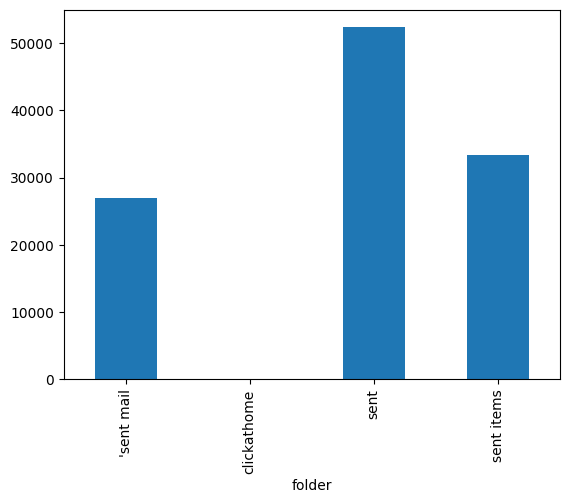

In [16]:
df.groupby('folder').sender.count().plot.bar(ylim=0)
plt.show()

In [17]:
df['recipient'] = get_field("X-To", df['email'])
df

C:\Users\dvroh\AppData\Local\Temp\ipykernel_28444\3750895604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recipient'] = get_field("X-To", df['email'])


,filepath,email,body,processedBody,sender,subject,date,folder,processed_subject,recipient
1417,arnold-j/sent_items/36.,Message-ID: <9123084.1075852711089.JavaMail.ev...,\n---------------------- Forwarded by John Arn...,NaN,arnold-j,Option Advisory Committee Meeting May 31,"Thu, 10 May 2001 17:21:00 -0700 (PDT)",sent items,Option Advisory Committee Meeting May 31,Mike Maggi <Mike Maggi/Corp/Enron@Enron>
1421,arnold-j/sent_items/264.,Message-ID: <24227153.1075852716775.JavaMail.e...,I'm big seller of interventions. they tend no...,I'm big seller of interventions. they tend no...,arnold-j,RE: okay here's what i got on the euro...,"Thu, 26 Jul 2001 06:23:05 -0700 (PDT)",sent items,okay here's what i got on the euro...,'epao@mba2002.hbs.edu'
1424,arnold-j/sent_items/412.,Message-ID: <29612920.1075852722144.JavaMail.e...,cold 11-15. oct expires tomorrow.\n\n -----Or...,cold 11-15. oct expires tomorrow.\n\n,arnold-j,RE: WHATS UP WITH WINTER BUYING,"Tue, 25 Sep 2001 06:47:41 -0700 (PDT)",sent items,WHATS UP WITH WINTER BUYING,"Fraser, Jennifer </O=ENRON/OU=NA/CN=RECIPIENTS..."
1425,arnold-j/sent_items/96.,Message-ID: <31893913.1075852712495.JavaMail.e...,you think i'm going to put this in ellectronic...,you think i'm going to put this in ellectronic...,arnold-j,Re: please fill in--i lost the scrap of paper,"Thu, 19 Apr 2001 19:33:00 -0700 (PDT)",sent items,please fill in--i lost the scrap of paper,Jennifer Fraser <Jennifer Fraser/ENRON@enronXg...
1426,arnold-j/sent_items/149.,Message-ID: <28828377.1075852713957.JavaMail.e...,yes. i'm leaving at 1:00 today/\n\n -----Orig...,yes. i'm leaving at 1:00 today/\n\n,arnold-j,RE: Re: Speakers,"Fri, 25 May 2001 09:29:00 -0700 (PDT)",sent items,Re: Speakers,"Hogan, Dalton </O=ENRON/OU=NA/CN=RECIPIENTS/CN..."
...,...,...,...,...,...,...,...,...,...,...
517239,scholtes-d/sent_items/18.,Message-ID: <20865574.1075840024696.JavaMail.e...,Our Purchases:\n\n11/1\tTo PSE-EPMI MC - you h...,Our Purchases:\n\n11/1\tTo PSE-EPMI MC - you h...,scholtes-d,RE: November detail,"Fri, 18 Jan 2002 19:21:57 -0800 (PST)",sent items,November detail,'Anne Snyder' <Anne_Snyder@pgn.com>
517240,scholtes-d/sent_items/12.,Message-ID: <9682082.1075840024546.JavaMail.ev...,\n\n-----Original Message-----\nFrom: sccobb@s...,NaN,scholtes-d,FW: E-Tag 1.7 Test Procedure,"Mon, 28 Jan 2002 12:03:48 -0800 (PST)",sent items,E-Tag 1.7 Test Procedure,"Semperger, Cara </O=ENRON/OU=NA/CN=RECIPIENTS/..."
517241,scholtes-d/sent_items/8.,Message-ID: <16491778.1075840024450.JavaMail.e...,1\n\n -----Original Message-----\nFrom: \tDiam...,1\n\n,scholtes-d,RE: **IMPORTANT** Stack Manager Users,"Fri, 1 Feb 2002 11:33:51 -0800 (PST)",sent items,**IMPORTANT** Stack Manager Users,"Diamond, Daniel </O=ENRON/OU=NA/CN=RECIPIENTS/..."
517242,scholtes-d/sent_items/124.,Message-ID: <17311779.1075840027415.JavaMail.e...,"Stewart, \n \nI left you an envelope with info...","Stewart, \n \nI left you an envelope with info...",scholtes-d,FW: Credit w/ City of Klamath Falls,"Sun, 21 Oct 2001 13:20:33 -0700 (PDT)",sent items,Credit w/ City of Klamath Falls,"Rosman, Stewart </O=ENRON/OU=NA/CN=RECIPIENTS/..."


In [19]:
df['recipient'].value_counts()

recipient
vkaminski@aol.com                                                                                                                                                                                    1842
Suzanne Adams                                                                                                                                                                                         840
Shirley Crenshaw                                                                                                                                                                                      550
'vkaminski@aol.com'                                                                                                                                                                                   473
Evelyn Metoyer                                                                                                                                                                        

In [20]:
from collections import Counter

s = df.sender
counts = Counter(s)
print(dict(counts))
send_df = pd.DataFrame.from_dict(counts, orient='index').reset_index().sort_values(0, ascending=False)
send_df = send_df.rename(columns={'index':'sender', 0:'count'})
send_df.head(18)

{'arnold-j': 1423, 'phanis-s': 4, 'lavorato-j': 1243, 'stclair-c': 1311, 'townsend-j': 81, 'forney-j': 395, 'symes-k': 2564, 'reitmeyer-j': 53, 'hyatt-k': 319, 'steffes-j': 1361, 'kaminski-v': 8055, 'wolfe-j': 79, 'mcconnell-m': 1647, 'skilling-j': 570, 'zipper-a': 325, 'shively-h': 612, 'donoho-l': 214, 'sanchez-m': 98, 'delainey-d': 1684, 'germany-c': 4812, 'whalley-l': 414, 'buy-r': 707, 'tholt-j': 666, 'cash-m': 1094, 'sanders-r': 1905, 'staab-t': 93, 'semperger-c': 259, 'mccarty-d': 138, 'mclaughlin-e': 644, 'ring-a': 231, 'stokley-c': 490, 'hain-m': 355, 'weldon-c': 406, 'ring-r': 38, 'farmer-d': 1670, 'sager-e': 1445, 'zufferli-j': 304, 'ybarbo-p': 130, 'watson-k': 955, 'dasovich-j': 4555, 'arora-h': 68, 'slinger-r': 45, 'martin-t': 244, 'storey-g': 126, 'ruscitti-k': 371, 'shankman-j': 783, 'schwieger-j': 143, 'perlingiere-d': 1926, 'saibi-e': 29, 'griffith-j': 24, 'meyers-a': 11, 'grigsby-m': 825, 'taylor-m': 2354, 'rapp-b': 101, 'causholli-m': 220, 'derrick-j': 656, 'bass-e':

,sender,count
72,mann-k,8489
10,kaminski-v,8055
19,germany-c,4812
39,dasovich-j,4555
61,shackleton-s,4376
77,jones-t,4072
59,beck-s,2634
6,symes-k,2564
56,bass-e,2453
84,scott-s,2407


In [21]:
# here we are droping uncertain data

top_authors = df.value_counts(["sender"])[:13]
df = df.loc[df["sender"].isin(list(top_authors.index.get_level_values(0)))].reset_index(drop=True)
df = df[df["processedBody"]!=" "]
df = df[df["processedBody"]!="\n"]
df = df.dropna()
df

,filepath,email,body,processedBody,sender,subject,date,folder,processed_subject,recipient
0,symes-k/sent/1290.,Message-ID: <7046567.1075841908922.JavaMail.ev...,Chris -\nWould you mind e-mailing Evelyn your ...,Chris -\nWould you mind e-mailing Evelyn your ...,symes-k,Automated Power Exchange,"Mon, 30 Apr 2001 07:55:00 -0700 (PDT)",sent,Automated Power Exchange,Chris H Foster
1,symes-k/sent/36.,Message-ID: <22564088.1075841879733.JavaMail.e...,"Looks great, Anna.","Looks great, Anna.",symes-k,Re: Holiday Party Mailing List,"Fri, 27 Oct 2000 03:32:00 -0700 (PDT)",sent,Holiday Party Mailing List,Anna Mehrer
2,symes-k/sent/667.,Message-ID: <21601140.1075841894251.JavaMail.e...,"I came, I saw, I viewed.....and now I will eat...","I came, I saw, I viewed.....and now I will eat...",symes-k,"Re: One tomato, two tomato, three tomato, four!","Thu, 22 Feb 2001 10:05:00 -0800 (PST)",sent,"One tomato, two tomato, three tomato, four!",Grace Rodriguez
3,symes-k/sent/1023.,Message-ID: <5071824.1075841902668.JavaMail.ev...,Following are the deals I changed to the corre...,Following are the deals I changed to the corre...,symes-k,Re: More deals found by Will Smith,"Thu, 29 Mar 2001 05:45:00 -0800 (PST)",sent,More deals found by Will Smith,Cara Semperger
4,symes-k/sent/759.,Message-ID: <11201614.1075841896397.JavaMail.e...,Thanks!,Thanks!,symes-k,Re: 535799,"Mon, 5 Mar 2001 00:53:00 -0800 (PST)",sent,535799,Sean Crandall
...,...,...,...,...,...,...,...,...,...,...
51070,nemec-g/sent/752.,Message-ID: <12630318.1075842683424.JavaMail.e...,Attached for your review is a draft of the Los...,Attached for your review is a draft of the Los...,nemec-g,Lost Creek IT Agreement,"Mon, 21 Aug 2000 11:54:00 -0700 (PDT)",sent,Lost Creek IT Agreement,"Mark Whitt@ECT, James Hoff"
51071,nemec-g/sent/893.,Message-ID: <24469094.1075842686699.JavaMail.e...,"Chris, Attached is a redlined of the revised ...","Chris, Attached is a redlined of the revised ...",nemec-g,ENA-Lost Creek IT Agreement,"Fri, 27 Oct 2000 07:06:00 -0700 (PDT)",sent,ENA-Lost Creek IT Agreement,choekenga@br-inc.com
51072,nemec-g/sent/351.,Message-ID: <9777889.1075842673263.JavaMail.ev...,Let's talk.\n\n\n---------------------- Forwar...,Let's talk.\n\n,nemec-g,Agreement to Upgrade and Operate Natural Gas P...,"Mon, 17 Jan 2000 07:59:00 -0800 (PST)",sent,Agreement to Upgrade and Operate Natural Gas P...,Eric Gillaspie
51073,nemec-g/sent/2360.,Message-ID: <3389850.1075842908651.JavaMail.ev...,I plan on attending the dinner.,I plan on attending the dinner.,nemec-g,Re: Enron Law Conference - Dinner Attendance,"Tue, 10 Apr 2001 06:38:00 -0700 (PDT)",sent,Enron Law Conference - Dinner Attendance,Sara Davidson


In [22]:
import pandas as pd
import nltk
from textblob import TextBlob

# Download NLTK data if not already downloaded
nltk.download('punkt')

# Functions to calculate various features
def word_count(text):
    words = nltk.word_tokenize(text)
    return len(words)

def paragraph_count(text):
    paragraphs = text.split('\n\n')
    return len(paragraphs)

def sentence_count(text):
    sentences = nltk.sent_tokenize(text)
    return len(sentences)

def average_word_length(text):
    words = nltk.word_tokenize(text)
    total_length = sum(len(word) for word in words)
    return total_length / len(words) if len(words) > 0 else 0

def polarity_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def num_recipients(to_field):
    recipients = to_field.split(',')
    return len(recipients)


[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


In [23]:
# Function to add columns to a DataFrame
def add_columns_to_dataframe(df):
    df['WordCount'] = df['processedBody'].apply(word_count)
    df['SubjectWordCount'] = df['processed_subject'].apply(word_count)
    df['ParagraphCount'] = df['processedBody'].apply(paragraph_count)
    df['SentenceCount'] = df['processedBody'].apply(sentence_count)
    df['AverageWordLength'] = df['processedBody'].apply(average_word_length)
    df['SubjectAverageWordLength'] = df['processed_subject'].apply(average_word_length)
    df['PolarityScore'] = df['processedBody'].apply(polarity_score)
    df['SubjectPolarityScore'] = df['processed_subject'].apply(polarity_score)
    df['NumRecipients'] = df['recipient'].apply(num_recipients)
    return df

# Add columns to the DataFrame
df = add_columns_to_dataframe(df)
df

,filepath,email,body,processedBody,sender,subject,date,folder,processed_subject,recipient,WordCount,SubjectWordCount,ParagraphCount,SentenceCount,AverageWordLength,SubjectAverageWordLength,PolarityScore,SubjectPolarityScore,NumRecipients
0,symes-k/sent/1290.,Message-ID: <7046567.1075841908922.JavaMail.ev...,Chris -\nWould you mind e-mailing Evelyn your ...,Chris -\nWould you mind e-mailing Evelyn your ...,symes-k,Automated Power Exchange,"Mon, 30 Apr 2001 07:55:00 -0700 (PDT)",sent,Automated Power Exchange,Chris H Foster,53,3,2,4,3.735849,7.333333,0.200000,0.0,1
1,symes-k/sent/36.,Message-ID: <22564088.1075841879733.JavaMail.e...,"Looks great, Anna.","Looks great, Anna.",symes-k,Re: Holiday Party Mailing List,"Fri, 27 Oct 2000 03:32:00 -0700 (PDT)",sent,Holiday Party Mailing List,Anna Mehrer,5,4,1,1,3.200000,5.750000,0.800000,0.0,1
2,symes-k/sent/667.,Message-ID: <21601140.1075841894251.JavaMail.e...,"I came, I saw, I viewed.....and now I will eat...","I came, I saw, I viewed.....and now I will eat...",symes-k,"Re: One tomato, two tomato, three tomato, four!","Thu, 22 Feb 2001 10:05:00 -0800 (PST)",sent,"One tomato, two tomato, three tomato, four!",Grace Rodriguez,23,11,3,3,2.913043,3.363636,0.250000,0.0,1
3,symes-k/sent/1023.,Message-ID: <5071824.1075841902668.JavaMail.ev...,Following are the deals I changed to the corre...,Following are the deals I changed to the corre...,symes-k,Re: More deals found by Will Smith,"Thu, 29 Mar 2001 05:45:00 -0800 (PST)",sent,More deals found by Will Smith,Cara Semperger,123,6,5,3,3.764228,4.166667,0.150000,0.5,1
4,symes-k/sent/759.,Message-ID: <11201614.1075841896397.JavaMail.e...,Thanks!,Thanks!,symes-k,Re: 535799,"Mon, 5 Mar 2001 00:53:00 -0800 (PST)",sent,535799,Sean Crandall,2,1,1,1,3.500000,6.000000,0.250000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51070,nemec-g/sent/752.,Message-ID: <12630318.1075842683424.JavaMail.e...,Attached for your review is a draft of the Los...,Attached for your review is a draft of the Los...,nemec-g,Lost Creek IT Agreement,"Mon, 21 Aug 2000 11:54:00 -0700 (PDT)",sent,Lost Creek IT Agreement,"Mark Whitt@ECT, James Hoff",52,4,1,3,4.192308,5.000000,0.187500,0.0,2
51071,nemec-g/sent/893.,Message-ID: <24469094.1075842686699.JavaMail.e...,"Chris, Attached is a redlined of the revised ...","Chris, Attached is a redlined of the revised ...",nemec-g,ENA-Lost Creek IT Agreement,"Fri, 27 Oct 2000 07:06:00 -0700 (PDT)",sent,ENA-Lost Creek IT Agreement,choekenga@br-inc.com,50,4,1,6,3.960000,6.000000,0.200000,0.0,1
51072,nemec-g/sent/351.,Message-ID: <9777889.1075842673263.JavaMail.ev...,Let's talk.\n\n\n---------------------- Forwar...,Let's talk.\n\n,nemec-g,Agreement to Upgrade and Operate Natural Gas P...,"Mon, 17 Jan 2000 07:59:00 -0800 (PST)",sent,Agreement to Upgrade and Operate Natural Gas P...,Eric Gillaspie,4,9,2,1,2.500000,6.222222,0.000000,0.1,1
51073,nemec-g/sent/2360.,Message-ID: <3389850.1075842908651.JavaMail.ev...,I plan on attending the dinner.,I plan on attending the dinner.,nemec-g,Re: Enron Law Conference - Dinner Attendance,"Tue, 10 Apr 2001 06:38:00 -0700 (PDT)",sent,Enron Law Conference - Dinner Attendance,Sara Davidson,7,6,1,1,3.714286,5.833333,0.000000,0.0,1


In [24]:
#function to create a new attribute - most used POS in email
def feature_most_pos(text):
    if type(text) == str:
        blob = TextBlob(text)
        final_pos = []
        for word, pos in blob.tags:
            if word not in stopwords.words("english"):
                final_pos.append(pos)
        count_pos = Counter(final_pos)
        if count_pos.most_common():
            return count_pos.most_common()[0][0]
        else:
            return "Other"
    if type(text) == float:
        return np.NaN

##function to create a new attribute - get greeting words in email
def feature_get_greeting(text):
    if type(text) == str:
        if re.match(r"^\w+", text):
            greeting_word = re.match(r"^\w+", text).group()
            return greeting_word
        else:
            return "None"
    if type(text) == float:
        return np.NaN

##function to create a new attribute - finding the most commom word in email
def feature_most_common_word(text):
    if type(text) == str:
        blob = TextBlob(text)
        words = []
        for word, pos in blob.tags:
            words.append(word)
        count_word = Counter(words)
        if count_word.most_common():
            return count_word.most_common()[0][0]
        else:
            return np.NaN
    if type(text) == float:
        return np.NaN

In [25]:
# New functions for additional attributes
def most_used_pos(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    pos_counts = nltk.FreqDist(tag for (word, tag) in pos_tags)
    most_common_pos = pos_counts.most_common(1)
    return most_common_pos[0][0] if most_common_pos else None

def get_greeting_words(text):
    if type(text) == str:
        if re.match(r"^\w+", text):
            greeting_word = re.match(r"^\w+", text).group()
            return greeting_word
        else:
            return "None"
    if type(text) == float:
        return np.NaN
    
def most_common_word(text):
    words = nltk.word_tokenize(text.lower())
    word_counts = nltk.FreqDist(words)
    most_common = word_counts.most_common(1)
    return most_common[0][0] if most_common else None

In [26]:
nltk.download('averaged_perceptron_tagger')
def add_columns_to_dataframe(df):
    df['Most POS'] = df['processedBody'].apply(most_used_pos)
    df['Greetings'] = df['processedBody'].apply(get_greeting_words)
    df['Most Common Word'] = df['processedBody'].apply(most_common_word)
    df['Most POS Subject'] = df['processed_subject'].apply(most_used_pos)
    df['Greetings in Subject'] = df['processed_subject'].apply(get_greeting_words)
    df['Most Common Word in Subject'] = df['processed_subject'].apply(most_common_word)
    return df

# Add columns to the DataFrame
df = add_columns_to_dataframe(df)
df

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dvroh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,filepath,email,body,processedBody,sender,subject,date,folder,processed_subject,recipient,...,SubjectAverageWordLength,PolarityScore,SubjectPolarityScore,NumRecipients,Most POS,Greetings,Most Common Word,Most POS Subject,Greetings in Subject,Most Common Word in Subject
0,symes-k/sent/1290.,Message-ID: <7046567.1075841908922.JavaMail.ev...,Chris -\nWould you mind e-mailing Evelyn your ...,Chris -\nWould you mind e-mailing Evelyn your ...,symes-k,Automated Power Exchange,"Mon, 30 Apr 2001 07:55:00 -0700 (PDT)",sent,Automated Power Exchange,Chris H Foster,...,7.333333,0.200000,0.0,1,PRP,Chris,you,NNP,Automated,automated
1,symes-k/sent/36.,Message-ID: <22564088.1075841879733.JavaMail.e...,"Looks great, Anna.","Looks great, Anna.",symes-k,Re: Holiday Party Mailing List,"Fri, 27 Oct 2000 03:32:00 -0700 (PDT)",sent,Holiday Party Mailing List,Anna Mehrer,...,5.750000,0.800000,0.0,1,NNP,Looks,looks,NNP,Holiday,holiday
2,symes-k/sent/667.,Message-ID: <21601140.1075841894251.JavaMail.e...,"I came, I saw, I viewed.....and now I will eat...","I came, I saw, I viewed.....and now I will eat...",symes-k,"Re: One tomato, two tomato, three tomato, four!","Thu, 22 Feb 2001 10:05:00 -0800 (PST)",sent,"One tomato, two tomato, three tomato, four!",Grace Rodriguez,...,3.363636,0.250000,0.0,1,PRP,I,i,CD,One,tomato
3,symes-k/sent/1023.,Message-ID: <5071824.1075841902668.JavaMail.ev...,Following are the deals I changed to the corre...,Following are the deals I changed to the corre...,symes-k,Re: More deals found by Will Smith,"Thu, 29 Mar 2001 05:45:00 -0800 (PST)",sent,More deals found by Will Smith,Cara Semperger,...,4.166667,0.150000,0.5,1,NN,Following,-,NNP,More,more
4,symes-k/sent/759.,Message-ID: <11201614.1075841896397.JavaMail.e...,Thanks!,Thanks!,symes-k,Re: 535799,"Mon, 5 Mar 2001 00:53:00 -0800 (PST)",sent,535799,Sean Crandall,...,6.000000,0.250000,0.0,1,NNS,Thanks,thanks,CD,535799,535799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51070,nemec-g/sent/752.,Message-ID: <12630318.1075842683424.JavaMail.e...,Attached for your review is a draft of the Los...,Attached for your review is a draft of the Los...,nemec-g,Lost Creek IT Agreement,"Mon, 21 Aug 2000 11:54:00 -0700 (PDT)",sent,Lost Creek IT Agreement,"Mark Whitt@ECT, James Hoff",...,5.000000,0.187500,0.0,2,NNP,Attached,.,NNP,Lost,lost
51071,nemec-g/sent/893.,Message-ID: <24469094.1075842686699.JavaMail.e...,"Chris, Attached is a redlined of the revised ...","Chris, Attached is a redlined of the revised ...",nemec-g,ENA-Lost Creek IT Agreement,"Fri, 27 Oct 2000 07:06:00 -0700 (PDT)",sent,ENA-Lost Creek IT Agreement,choekenga@br-inc.com,...,6.000000,0.200000,0.0,1,NNP,Chris,.,NNP,ENA,ena-lost
51072,nemec-g/sent/351.,Message-ID: <9777889.1075842673263.JavaMail.ev...,Let's talk.\n\n\n---------------------- Forwar...,Let's talk.\n\n,nemec-g,Agreement to Upgrade and Operate Natural Gas P...,"Mon, 17 Jan 2000 07:59:00 -0800 (PST)",sent,Agreement to Upgrade and Operate Natural Gas P...,Eric Gillaspie,...,6.222222,0.000000,0.1,1,VB,Let,let,NNP,Agreement,agreement
51073,nemec-g/sent/2360.,Message-ID: <3389850.1075842908651.JavaMail.ev...,I plan on attending the dinner.,I plan on attending the dinner.,nemec-g,Re: Enron Law Conference - Dinner Attendance,"Tue, 10 Apr 2001 06:38:00 -0700 (PDT)",sent,Enron Law Conference - Dinner Attendance,Sara Davidson,...,5.833333,0.000000,0.0,1,PRP,I,i,NNP,Enron,enron


In [27]:
df.to_csv("./enron1.csv")